In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy import stats

In [2]:
data = pd.read_csv("crimedata2.csv", encoding='ISO-8859-1')

In [3]:
# all the features we put on the "new lit review" file, may make multiple models depending on which is most accurate.
features = [
    'population', 'PopDens', 'numbUrban', 'pctUrban', 'medIncome', 'MedRent', 'PctHousOccup', 'PctHousOwnOcc', 
    'PersPerOwnOccHous', 'PersPerRentOccHous'
]

# the dataset with all the features we are going to use
filtered_data = data[features]
filtered_data.head()

,population,PopDens,numbUrban,pctUrban,medIncome,MedRent,PctHousOccup,PctHousOwnOcc,PersPerOwnOccHous,PersPerRentOccHous
0,11980,1845.9,11980,100.0,75122,1001,98.37,91.01,3.00,2.84
1,23123,2186.7,23123,100.0,47917,627,97.15,84.88,2.83,1.96
2,29344,2780.9,29344,100.0,35669,484,95.68,57.79,2.69,2.06
3,16656,3217.7,0,0.0,20580,333,91.19,54.89,2.51,2.20
4,11245,974.2,0,0.0,17390,332,92.45,53.57,2.55,2.12


In [4]:
# replacing ?'s, chaning data types to float, and replacing null values with the mean.
filtered_data.replace('?', pd.NA, inplace=True)
filtered_data = filtered_data.astype(float)
filtered_data.fillna(filtered_data.mean(), inplace=True)

C:\Users\Rajee\AppData\Local\Temp\ipykernel_15424\2274309400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.replace('?', pd.NA, inplace=True)


In [5]:
# same thing with y
y = data['nonViolPerPop'].replace('?', pd.NA)
y = pd.to_numeric(y, errors='coerce')
y.fillna(y.mean(), inplace=True)


In [6]:
X = filtered_data

In [7]:
#splitting the dataset 80-20, 80% training, 20% testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#using randomforest regression, as linear regression gave me a mse of over 6.5 mill.
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [9]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 5913473.09564361


In [10]:
# describes our target variable
print(y.describe())


count     2215.000000
mean      4908.241804
std       2679.020528
min        116.790000
25%       2994.265000
50%       4576.610000
75%       6100.870000
max      27119.760000
Name: nonViolPerPop, dtype: float64


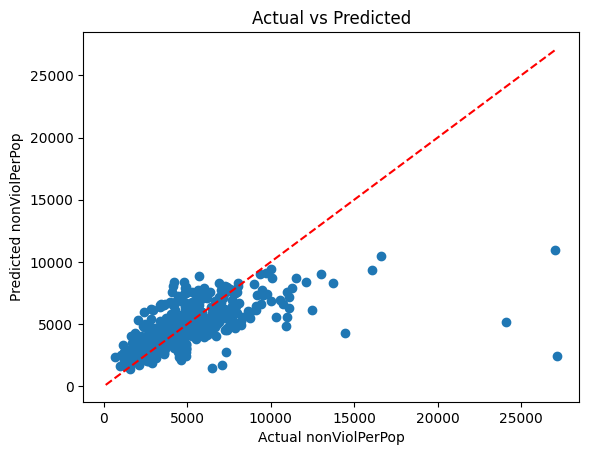

In [11]:
# plotting actual vs predicted values to see how accurate the model is. Also shows outliers.
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual nonViolPerPop')
plt.ylabel('Predicted nonViolPerPop')
plt.title('Actual vs Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()


In [12]:
# most imporant features of the dataset.
feature_importances = model.feature_importances_
feature_names = filtered_data.columns
importance = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
print(importance.sort_values(by='Importance', ascending=False))


              Feature  Importance
4           medIncome    0.265917
7       PctHousOwnOcc    0.195119
6        PctHousOccup    0.109923
8   PersPerOwnOccHous    0.082403
9  PersPerRentOccHous    0.080194
0          population    0.075805
1             PopDens    0.065736
5             MedRent    0.063337
2           numbUrban    0.053255
3            pctUrban    0.008310
